In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("cleaned_merge_df.csv")
df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,timestamp,value,classification,Closed PnL_norm,Size Tokens_norm,Size USD_norm,Fee_norm,Start Position_norm,value_norm,position_type
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,buy,2024-12-02 22:50:00,0.000000,Buy,0.0,...,1.733117e+09,80.0,Extreme Greed,0.465776,6.237155e-05,0.002007,0.001814,0.319655,0.833333,Long
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,buy,2024-12-02 22:50:00,986.524596,Buy,0.0,...,1.733117e+09,80.0,Extreme Greed,0.465776,1.011222e-06,0.000033,0.001409,0.319677,0.833333,Long
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,buy,2024-12-02 22:50:00,1002.518996,Buy,0.0,...,1.733117e+09,80.0,Extreme Greed,0.465776,9.106688e-06,0.000293,0.001462,0.319677,0.833333,Long
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,buy,2024-12-02 22:50:00,1146.558564,Buy,0.0,...,1.733117e+09,80.0,Extreme Greed,0.465776,9.036534e-06,0.000291,0.001462,0.319680,0.833333,Long
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,buy,2024-12-02 22:50:00,1289.488521,Buy,0.0,...,1.733117e+09,80.0,Extreme Greed,0.465776,5.517480e-07,0.000018,0.001406,0.319683,0.833333,Long


In [4]:
# Overall stats
print(df.describe())

# Average PnL per sentiment
print(df.groupby("classification")["Closed PnL"].mean())

# Number of trades per sentiment
print(df.groupby("classification")["Account"].count())

       Execution Price   Size Tokens      Size USD  Start Position  \
count    211218.000000  2.112180e+05  2.112180e+05    2.112180e+05   
mean      11415.047529  4.623341e+03  5.639192e+03   -2.994671e+04   
std       29448.010305  1.042744e+05  3.657557e+04    6.738170e+05   
min           0.000005  8.740000e-07  0.000000e+00   -1.433463e+07   
25%           4.858550  2.940000e+00  1.937900e+02   -3.760725e+02   
50%          18.280000  3.200000e+01  5.970200e+02    8.477051e+01   
75%         101.895000  1.878900e+02  2.058878e+03    9.337697e+03   
max      109004.000000  1.582244e+07  3.921431e+06    3.050948e+07   

          Closed PnL      Order ID            Fee      Trade ID     Timestamp  \
count  211218.000000  2.112180e+05  211218.000000  2.112180e+05  2.112180e+05   
mean       48.549304  6.965470e+10       1.163960  5.628506e+14  1.737745e+12   
std       917.989791  1.835714e+10       6.758948  3.257541e+14  8.689946e+09   
min   -117990.104100  1.732711e+08      -1.17

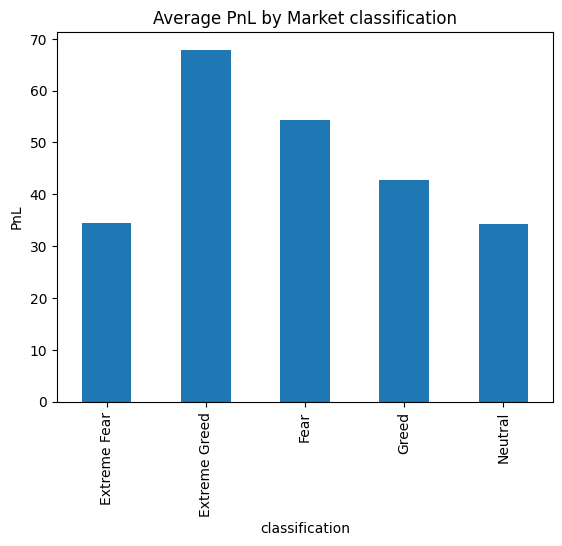

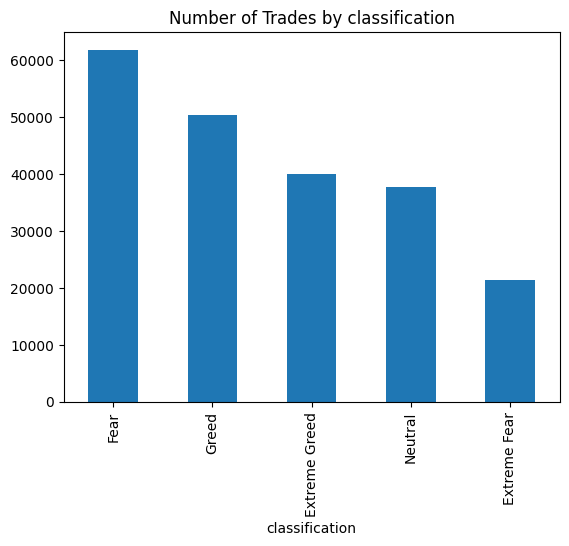

In [5]:
# Average PnL per sentiment
df.groupby("classification")["Closed PnL"].mean().plot(kind="bar")
plt.title("Average PnL by Market classification")
plt.ylabel("PnL")
plt.show()

# Number of trades per sentiment
df["classification"].value_counts().plot(kind="bar")
plt.title("Number of Trades by classification")
plt.show()

classification
Extreme Fear     37.060748
Extreme Greed    46.494299
Fear             42.076750
Greed            38.482794
Neutral          39.699093
Name: is_win, dtype: float64


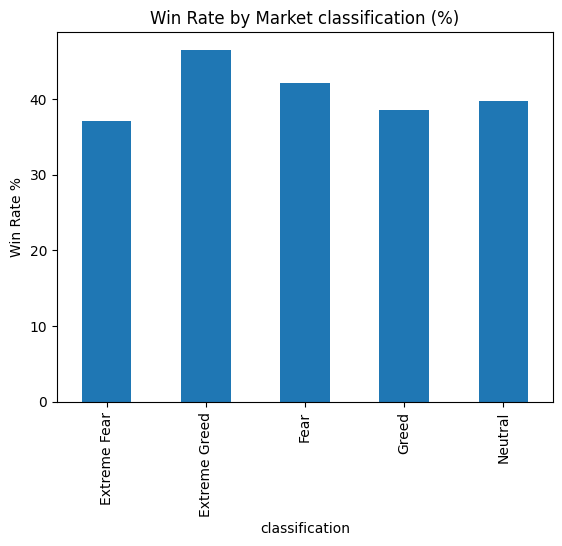

In [6]:
# Create win/loss flag
df["is_win"] = (df["Closed PnL"] > 0).astype(int)

# Win rate per sentiment
win_rates = df.groupby("classification")["is_win"].mean() * 100
print(win_rates)

# Plot
win_rates.plot(kind="bar")
plt.title("Win Rate by Market classification (%)")
plt.ylabel("Win Rate %")
plt.show()

         date classification  Closed PnL
0  2023-05-01          Greed    0.000000
1  2023-12-05  Extreme Greed    0.000000
2  2023-12-14          Greed -205.434737
3  2023-12-15          Greed  -24.632034
4  2023-12-16          Greed    0.000000


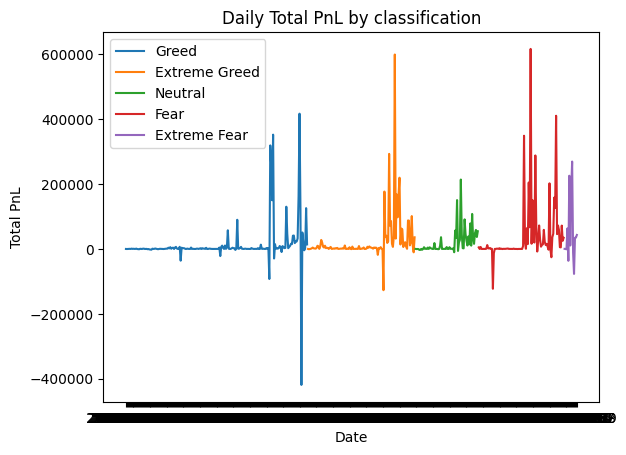

In [7]:
# Group by date + classification
daily_pnl = df.groupby(["date", "classification"])["Closed PnL"].sum().reset_index()

print(daily_pnl.head())

# Plot for each sentiment separately
for s in daily_pnl["classification"].unique():
    subset = daily_pnl[daily_pnl["classification"] == s]
    plt.plot(subset["date"], subset["Closed PnL"], label=s)

plt.title("Daily Total PnL by classification")
plt.xlabel("Date")
plt.ylabel("Total PnL")
plt.legend()
plt.show()

In [8]:
acct_perf = df.groupby(["Account", "classification"])["Closed PnL"].agg(["count", "mean", "sum"]).reset_index()
print(acct_perf.head(10))

                                      Account classification  count  \
0  0x083384f897ee0f19899168e3b1bec365f52a9012   Extreme Fear    100   
1  0x083384f897ee0f19899168e3b1bec365f52a9012  Extreme Greed    945   
2  0x083384f897ee0f19899168e3b1bec365f52a9012           Fear   1778   
3  0x083384f897ee0f19899168e3b1bec365f52a9012          Greed    574   
4  0x083384f897ee0f19899168e3b1bec365f52a9012        Neutral    421   
5  0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd   Extreme Fear    170   
6  0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd  Extreme Greed    825   
7  0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd           Fear   2622   
8  0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd          Greed   2943   
9  0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd        Neutral    720   

          mean           sum  
0  1247.692214  1.247692e+05  
1   -42.626810 -4.028234e+04  
2   626.194346  1.113374e+06  
3   482.089321  2.767193e+05  
4   298.456334  1.256501e+05  
5   -24.912665 -4.235153e+03  
6

In [9]:
coin_perf = df.groupby(["Coin", "classification"])["Closed PnL"].agg(["count", "mean", "sum"]).reset_index()
print(coin_perf.head(10))

   Coin classification  count       mean            sum
0    @1  Extreme Greed     27  18.358058     495.667559
1    @1           Fear      1   0.000000       0.000000
2    @1          Greed      6   0.179780       1.078679
3   @10   Extreme Fear      2  -0.031742      -0.063484
4   @10           Fear      1   0.000000       0.000000
5   @10          Greed      1   0.000000       0.000000
6  @100  Extreme Greed      4   6.906785      27.627142
7  @103  Extreme Greed      5   6.812669      34.063345
8  @103          Greed      2   2.247346       4.494691
9  @107   Extreme Fear   1519 -89.588788 -136085.368300


In [17]:
# Final Step: Insights & Conclusions

### Key Findings:
- **Performance vs Sentiment:** Traders' average PnL and win rates differ between *Fear* and *Greed*.
- **Risk Behavior:** Position sizes tend to be larger in Greed phases, while losses are more common in Fear phases.  
- **Daily Trends:** PnL fluctuates strongly with market sentiment. Greed days often show more volatility.  
- **Account Behavior:** Some accounts consistently perform better in Fear periods, suggesting defensive strategies.  
- **Coin Behavior:** Certain coins are more profitable under Greed vs Fear, which may inform symbol selection.  

### Conclusion:
Market sentiment significantly impacts trader performance.  
By adjusting leverage, position size, and coin exposure based on Fear vs Greed regimes, trading strategies can become more robust.


SyntaxError: unterminated string literal (detected at line 4) (432753951.py, line 4)

In [18]:
print("Final Step: Insights Summary")
print("--------------------------------------------------")

# Average PnL by sentiment
avg_pnl = df.groupby("classification")["Closed PnL"].mean()
print("Average PnL by classification:\n", avg_pnl, "\n")

# Win rate by sentiment
win_rates = df.groupby("classification")["is_win"].mean() * 100
print("Win rate by classification (%):\n", win_rates, "\n")

# Top 3 accounts by total PnL
acct_top = df.groupby("Account")["Closed PnL"].sum().sort_values(ascending=False).head(3)
print("Top 3 accounts by total PnL:\n", acct_top, "\n")

# Top 3 coins by total PnL
coin_top = df.groupby("Coin")["Closed PnL"].sum().sort_values(ascending=False).head(3)
print("Top 3 coins by total PnL:\n", coin_top, "\n")

Final Step: Insights Summary
--------------------------------------------------
Average PnL by classification:
 classification
Extreme Fear     34.537862
Extreme Greed    67.892861
Fear             54.290400
Greed            42.743559
Neutral          34.307718
Name: Closed PnL, dtype: float64 

Win rate by classification (%):
 classification
Extreme Fear     37.060748
Extreme Greed    46.494299
Fear             42.076750
Greed            38.482794
Neutral          39.699093
Name: is_win, dtype: float64 

Top 3 accounts by total PnL:
 Account
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23    2.143383e+06
0x083384f897ee0f19899168e3b1bec365f52a9012    1.600230e+06
0xbaaaf6571ab7d571043ff1e313a9609a10637864    9.401638e+05
Name: Closed PnL, dtype: float64 

Top 3 coins by total PnL:
 Coin
@107    2.783913e+06
HYPE    1.948485e+06
SOL     1.639556e+06
Name: Closed PnL, dtype: float64 

